In [1]:
# Package imports
import random
from random import randint
import time

import os
import json
import string
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import contextily as cx
import warnings
import shapely
from shapely.geometry import Point, Polygon, LineString, LinearRing
import math
from tqdm import tqdm

             id           @id access addr:city addr:country addr:county  \
0  way/50994512  way/50994512    NaN       NaN          NaN         NaN   
1  way/51767141  way/51767141    NaN    Dublin          NaN         NaN   
2  way/51767671  way/51767671    NaN       NaN          NaN         NaN   
3  way/51995740  way/51995740    NaN    Dublin          NaN         NaN   
4  way/52304330  way/52304330    NaN    Dublin           IE      Dublin   

  addr:housename addr:housenumber addr:postcode        addr:street  ...  \
0            NaN              NaN           NaN                NaN  ...   
1            NaN                6           NaN       Finglas Road  ...   
2            NaN              NaN           NaN                NaN  ...   
3            NaN              NaN           NaN   Royal Canal Bank  ...   
4            NaN              NaN      D09 XW44  Cross Guns Bridge  ...   

   smoking source sport start_date takeaway telecom tourism  \
0      NaN    NaN   NaN        NaN 

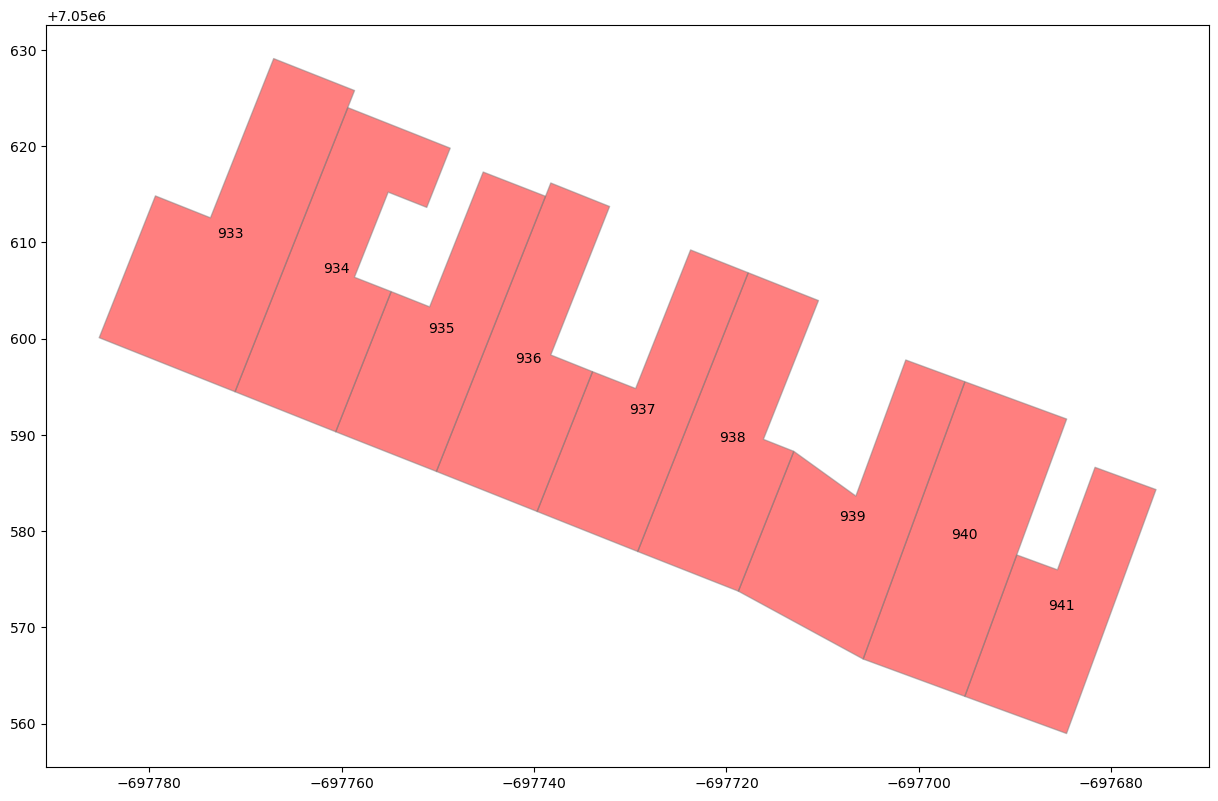

In [14]:
gdf = gpd.read_file('geojson_polygons/whitworth_buildings.geojson')
convert = True
if convert and gdf.crs == 'EPSG:4326':
    gdf = gdf.to_crs(3857)

print(gdf.head())

fig, ax = plt.subplots(1,1,figsize=(15,10))
gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]
gdf['name'] = [idx for idx in range(len(gdf))]

gdf_subset = gdf.iloc[933:942]

gdf_subset.plot(ax=ax, edgecolor='grey', facecolor='red', alpha=0.5)
cx.add_basemap(ax, crs='EPSG:3857', attribution=False, source=cx.providers.CartoDB.Voyager)

gdf_subset.apply(lambda x: ax.annotate(text=x['name'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)


plt.show()